In [8]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [9]:
def set_publication_style1():
    plt.rcParams.update({
        'text.usetex': True,
        'font.family': 'serif',
        'font.size': 12,
        'axes.labelsize': 14,
        'axes.titlesize': 14,
        'axes.titlepad': 14,
        'xtick.labelsize': 12,
        'ytick.labelsize': 12,
        'legend.fontsize': 12,
        'lines.linewidth': 2,
        'lines.markersize': 6,
        'axes.linewidth': 1.2,
        'xtick.major.size': 6,
        'xtick.major.width': 1.2,
        'ytick.major.size': 6,
        'ytick.major.width': 1.2,
        'figure.figsize': (6, 4),
        'savefig.dpi': 600,
        'savefig.format': 'png'
    })


set_publication_style1()

Epoch 0, Loss: 18.8213
Epoch 10, Loss: 16.0111
Epoch 20, Loss: 6.9915
Epoch 30, Loss: 2.4283
Epoch 40, Loss: 1.5862
Epoch 50, Loss: 1.1538
Epoch 60, Loss: 0.9467
Epoch 70, Loss: 0.8328
Epoch 80, Loss: 0.7771
Epoch 90, Loss: 0.7078
Test MSE: 0.8984


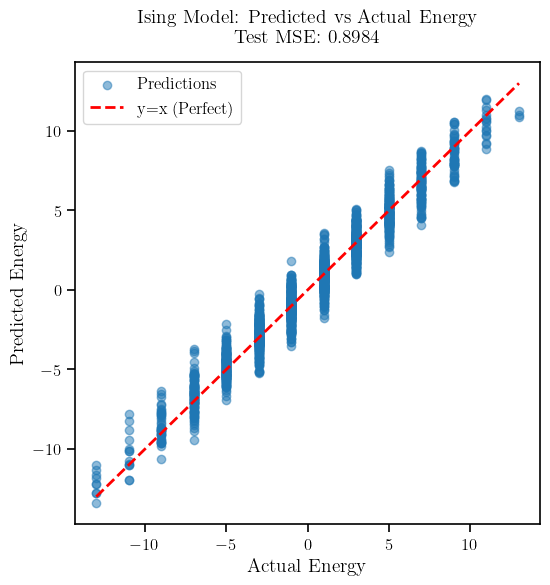

In [ ]:
# Parameters
N = 20  # Number of spins
J = 1.0  # Interaction strength
h = 0.0  # External field
num_samples = 10000  # Dataset size

# Generate random spin configurations and compute energies
def generate_data(num_samples, N, J, h):
    X = np.random.choice([-1, 1], size=(num_samples, N))
    E = -J * np.sum(X[:, :-1] * X[:, 1:], axis=1) - h * np.sum(X, axis=1)
    return X.astype(np.float32), E.astype(np.float32)

X, E = generate_data(num_samples, N, J, h)

# Train-test split (80% train, 20% test)
X_train, X_test, E_train, E_test = train_test_split(X, E, test_size=0.2, random_state=42)

# Convert to PyTorch tensors
X_train, E_train = torch.tensor(X_train), torch.tensor(E_train).unsqueeze(1)
X_test, E_test = torch.tensor(X_test), torch.tensor(E_test).unsqueeze(1)

# Define Neural Network
class IsingEnergyNN(nn.Module):
    def __init__(self, N):
        super(IsingEnergyNN, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(N, 32),
            nn.ReLU(),
            nn.Linear(32, 32),
            nn.ReLU(),
            nn.Linear(32, 1)
        )

    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model = IsingEnergyNN(N)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Train model
epochs = 100
for epoch in range(epochs):
    optimizer.zero_grad()
    E_pred = model(X_train)
    loss = criterion(E_pred, E_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 10 == 0:
        print(f"Epoch {epoch}, Loss: {loss.item():.4f}")

# Evaluate on test data
with torch.no_grad():
    E_pred_test = model(X_test).numpy()
    E_actual_test = E_test.numpy()

# Compute and report MSE
test_mse = mean_squared_error(E_actual_test, E_pred_test)
print(f"Test MSE: {test_mse:.4f}")

# Plot: Predicted vs Actual Energy (Diagonal Plot)
plt.figure(figsize=(6, 6))
plt.scatter(E_actual_test, E_pred_test, alpha=0.5, label="Predictions")
plt.plot([min(E_actual_test), max(E_actual_test)], [min(E_actual_test), max(E_actual_test)], 'r--', label="y=x")
plt.xlabel("Actual Energy")
plt.ylabel("Predicted Energy")
plt.legend()
plt.title(f"Ising Model: Predicted vs Actual Energy\nTest MSE: {test_mse:.4f}")
plt.show()
